# Métodos de Monte Carlo

Métodos descritos como Monte Carlo (MMC) incluem uma vasta gama de simulações estatísticas. Estes métodos utilizam sequências de números pseudoaleatórios para fazer uma simulação, e são aplicados em geral quando algum método de discretização não funciona ou não é prático. 

## Integração de Monte Carlo

Um exemplo clássico é o cálculo da integral de uma função num espaço de alta dimensionalidade, quando o número de amostragens fica proibitivamente alto. Ainda em integrais, algumas funções têm derivadas que variam muito rapidamente, e não é possível aplicar os métodos que estudamos, como o do trapézio, Simpson, ou mesmo quadratura gaussiana.

Veja, por exemplo, a função

\begin{align}
f(x) &= \sin^2 \left[\frac{1}{x(2 - x)}\right].
\end{align}

A sua integral no intervalo $(a, b) = (0, 2)$

\begin{align}
I &= \int_a^b f(x)\,\mathrm{d}x \\
I &= \int_0^2 \sin^2 \left[\frac{1}{x(2 - x)}\right]\,\mathrm{d}x,
\end{align}

é equivalente à área sob a curva $f(x)$, conforme o gráfico abaixo.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'stix'

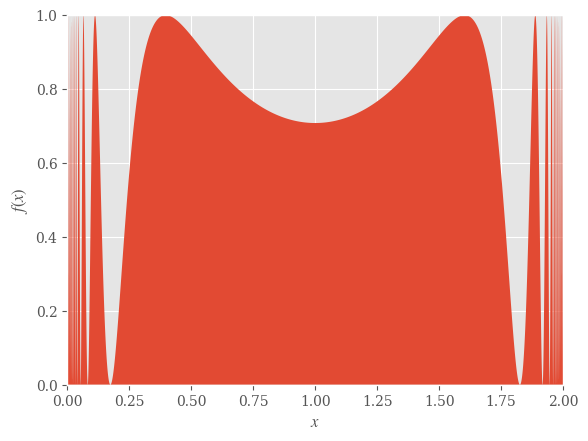

In [2]:
def f(x):
    return (np.sin(1.0 / (x * (2 - x))))**2


# Exclui o primeiro e o último elemento
# para evitar divisão por zero.
x = np.linspace(0.0, 2.0, 10000)[1:-1]

fig, ax = plt.subplots()
ax.fill_between(x, f(x), 0)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$f(x)$')
ax.set_xlim(0.0, 2.0)
ax.set_ylim(0.0, 1.0)
plt.show()

Experimente calcular esta integral com algum método numérico que vimos anteriormente. Uma amostragem uniforme desta função particular não irá capturar a variação rápida perto de $0$ e $2$. De qualquer modo, vamos recapitular a regra do retângulo, e ver se encontramos uma forma de resolver este problema.

Se temos $N$ amostras de $f(x)$ dentro do intervalo de integração,

$$
I = \int_a^b f(x)\,\mathrm{d}x \approx \sum_{i=0}^{N-1} f(x_i)\, \Delta x
$$

Com um intervalo $\Delta x$ uniforme,

\begin{align}
\Delta x &= \frac{b-a}{N} \\
\implies I &\cong \sum_{i=0}^{N-1} f(x_i)\frac{b - a}{N} = (b - a)\frac{\sum_{i=0}^{N-1} f(x_i)}{N}.
\end{align}

Repare como a fração é igual à média aritmética das amostras de $f(x)$.

$$
I \cong (b - a) \langle f(x_i) \rangle_i.
$$

Com $N \to \infty$, a igualdade fica exata.

$$
I = (b - a) \langle f \rangle.
$$

Agora, vem o pulo do gato. Derivamos a equação acima supondo que a amostragem é igualmente espaçada. Por outro lado, o resultado depende apenas do valor médio da função no intevalo. Se tivermos um método mais robusto para calcular o valor médio da função, o resultado tem que ser o mesmo! É aí que entram os números aleatórios.

Tomamos uma sequência de $N$ números aleatórios dentro do intervalo, e como a probabilidade da distribuição dos pontos é uniforme, a média aritmética das amostragens $f(x_i)$ se aproxima de $\langle f \rangle$ conforme $N$ aumenta.

Qual é o erro na estimativa da média? O erro deve se originar na distribuição dos valores de $f(x_i)$, portanto precisamos saber os erros associados a esses valores. Vamos supor que todos têm incertezas iguais a $\sigma_i$.

O erro na integral, então, pode ser calculado usando a propagação de erros,
\begin{align}
\sigma_I^2 &= \sum_{j=0}^{N-1} \left( \frac{\partial I}{\partial f_j}\right)^2 \sigma_j^2.
\end{align}

onde simplificamos a notação fazendo $f_j = f(x_j)$. Substituindo

$$
I = (b - a)\frac{\sum_{i=0}^{N-1} f(x_i)}{N},
$$

ficamos com

\begin{align}
\sigma_I^2 &= \sum_{j=0}^{N-1}\left( \frac{b - a}{N} \sum_{i=0}^{N-1} \frac{\partial f_i}{\partial f_j}\right)^2 \sigma_f^2 \\
&= \left( \frac{b - a}{N} \right)^2\ \sum_{j=0}^{N-1}\left(\sum_{i=0}^{N-1} \frac{\partial f_i}{\partial f_j}\right)^2 \sigma_f^2.
\end{align}

Essa quantidade maluca $\frac{\partial f_i}{\partial f_j}$ nos diz quanto $f_i$ varia em relação a $f_j$. Porém, todas os valores são independentes, logo a variação é zero, exceto quando $i=j$. Neste caso, $\frac{\partial f_i}{\partial f_i} = 1$. Uma quantidade como essa é chamada de [*delta de Kronecker*](https://en.wikipedia.org/wiki/Kronecker_delta), denotada como

$$
\frac{\partial f_i}{\partial f_j} = \delta_{ij}.
$$

O erro, neste caso, fica

\begin{align}
\sigma_I^2 &= \left( \frac{b - a}{N} \right)^2 \sum_{j=0}^{N-1}\left(\sum_{i=0}^{N-1} \delta_{ij}\right)^2 \sigma_j^2 \\
&= \left( \frac{b - a}{N} \right)^2 \sum_{j=0}^{N-1} \sigma_j^2 \\
\implies \sigma_I & = \frac{b - a}{N} \sqrt{\sum_{j=0}^{N-1} \sigma_j^2}.
\end{align}

Podemos estimar $\sigma_j$ através da variância dos valores $f(x_i)$, admitindo que são todos iguais a $\sigma_f$.  Assim,

\begin{align}
\sigma_f^2 &= \langle f^2 \rangle - \langle f \rangle^2 \\
&= \frac 1 N \sum_{i=0}^{N-1} f_i^2 - \left( \frac 1 N \sum_{i=0}^{N-1} f_i \right)^2.
\end{align}

Como $\sigma_f$ é constante,

\begin{align}
\sigma_I &= \frac{b - a}{N} \sqrt{\sigma^2_f \sum_{j=0}^{N-1} 1} \\
&= (b - a) \frac{\sigma_f \sqrt N}{N} \\
\implies \sigma_I &= (b - a) \frac{\sigma_f}{\sqrt N}.
\end{align}

O erro na integral cai com $N^{-1/2}$. Isso não é muito bom quando comparado, por exemplo, com a regra do trapézio, cujo erro cai com $N^{-2}$. Se aumentarmos a amostragem por um fator $100$, o erro no método Monte Carlo diminui por um fator $10$. Com a regra do trapézio, o erro diminui por um fator $10000$. Mas esta comparação é injusta, e de fato impossível em funções como a do nosso exemplo. O poder do método de Monte Carlo está justamente em ele poder ser aplicado a funções inviáveis com métodos tradicionais, então um erro caindo com $N^{-1/2}$ é o melhor que conseguimos arranjar nestes casos.

### Exercício 1

Usando o método de Monte Carlo, calcule a integral 

\begin{align}
I &= \int_a^b f(x)\,\mathrm{d}x \\
I &= \int_0^2 \sin^2 \left[\frac{1}{x(2 - x)}\right]\,\mathrm{d}x,
\end{align}

usando $N=1000$ amostras. Calcule também a incerteza na integral.

In [3]:
a = 0
b = 2
N = 1000

x = np.random.uniform(a,b,N)

I = np.sum(f(x))*(b-a)/N
print(f"O valor da integral calculada é I= {I:.3f}")

sig_f = (1/N) * np.sum(f(x)**2) - ((1/N) * np.sum(f(x)))**2
sig_I = ((b-a)/np.sqrt(N))*sig_f

print(f"O valor da incerteza na integral calculada é: sigma = {sig_I:.3f}")


O valor da integral calculada é I= 1.473
O valor da incerteza na integral calculada é: sigma = 0.004


### Exercício 2

Crie uma função que calcula a integral (e a incerteza) usando o método de Monte Carlo para um $N$ qualquer. Não esqueça de testar se o resultado é o mesmo do exercício anterior.

In [4]:
def integralMonteCarlo(a,b,N,func) -> tuple:

    x = np.random.uniform(a,b,N)
    I = np.sum(func(x))*(b-a)/N 

    sigma_f = (1/N) * np.sum(func(x)**2) - ((1/N) * np.sum(func(x)))**2
    sigma_I = ((b-a)/np.sqrt(N))*sigma_f

    return I, sigma_I

### Exercício 3

Calcule a integral para vários $N$, de $10^2$ até $10^5$ em intervalos logarítmicos (use `np.logspace(2, 5, M)`). Faça o gráfico de $I$ em função de $N$.

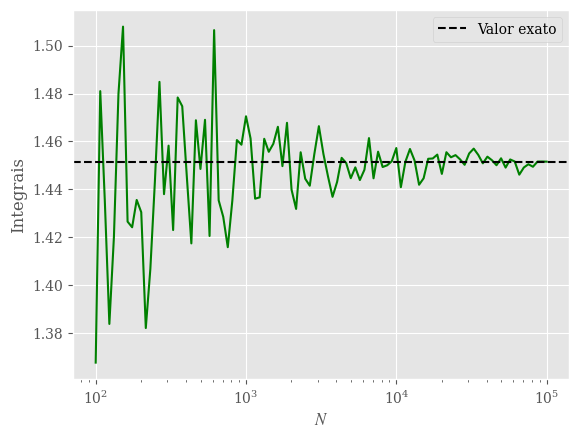

In [7]:
M = 100
NN = np.logspace(2,5,M)

Integrais = np.zeros(M)

for i in range(M):
    Integrais[i] = integralMonteCarlo(a,b,int(NN[i]),f)[0]

fig, ax = plt.subplots(1,1)
ax.plot(NN,Integrais, color = "green")
ax.axhline(1.4514,0, ls="--", color = "black", label = "Valor exato")
ax.set_xlabel(r"$N$")
ax.set_ylabel(r"Integrais")
ax.set_xscale("log")
ax.legend()

## MMC em múltiplas dimensões

O MMC pode ser generalizado facilmente para múltiplas dimensões. É fácil demonstrar que uma integral definida da função de $M$ variáveis $f(\mathbf{r})$ num (hiper-)volume $V$ pode ser aproximado pela equação

$$
I = \int_V f(\mathbf{r})\,\mathrm{d}\mathbf{r} \approx \frac{V}{N} \sum_{i=0}^{N-1} f(\mathbf{r}_i).
$$

A demonstração é simples, basta escrever a integral de cada dimensão explicitamente e proceder como fizemos acima.

Vamos ver como aplicar o MMC para calcular o volume de uma hiper-esfera com $M = 10$ dimensões. Para calcular o volume, precisamos de uma função que o defina. No caso de uma hiper-esfera, o volume é definido como todos os pontos tais que $x_0^2 + x_1^2 + \ldots + x_{M-1}^2 \leq R^2$, onde $R$ é o seu raio. Uma definição possível é a função abaixo

\begin{align}
f(\mathbf{r}) = f(x_0, x_1, \ldots, x_{M-1}) = \left\{ \
\begin{array}{ll}
1 \qquad &\text{se}\ x_0^2 + x_1^2 + \ldots + x_{M-1}^2 \leq R^2, \\
0 \qquad &\text{caso contrário}.
\end{array}
\right .
\end{align}

Precisamos usar um volume limite de integração que cubra toda a hiper-esfera. O mais simples é um hiper-cubo com centro que coincide com o da esfera, de lado igual a $2R$. A figura abaixo ilustra o caso de 2 dimensões com $R = 1$.

[*CC0 Mysid Yoderj*](https://commons.wikimedia.org/wiki/File:MonteCarloIntegrationCircle.svg)

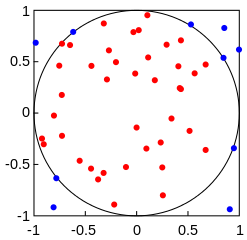

O volume limite de integração é $V = (2R)^M$, com as coordenadas $x_k$ variando entre -1 e 1. Vamos então definir a função $f(\mathbf{r})$ e calcular o volume da hiper-esfera de $M = 10$ dimensões com $R = 1$.

In [69]:
np.random.seed(1)

def f(r):
    r2 = 0.0
    for i in range(len(r)):
        r2 += r[i]**2
        
    # Retorna o primeiro valor se a condição
    # é verdadeira, e o segundo se é falsa.
    if r2 <= R**2:
        return 1.0
    else:
        return 0.0

R = 1
M = 10
a,b = -R, R
V = (2 * R)**M
# 100 mil pontos
N = int(1e5)

soma = 0.0
for _ in range(N):
    # Um ponto r é representado por
    # um array de M elementos.
    r = np.zeros(M)
    for i in range(M):
        r[i] = np.random.uniform(a, b)
    soma += f(r)

V_hiperesfera = soma * V / N
print(f'Volume da hiper-esfera unitária de {M} dimensões: {V_hiperesfera:.4f}')

Volume da hiper-esfera unitária de 10 dimensões: 2.6931


O volume de uma hiper-esfera unitária de 10 dimensões é conhecido, $V_{10} = \frac{\pi^5}{120}$. Neste caso, podemos estimar o valor de $\pi$.

In [70]:
V_real_hiperesfera = np.pi**5 / 120
print(f'Volume analítico: {V_real_hiperesfera}')
e = (V_hiperesfera - V_real_hiperesfera) / V_real_hiperesfera
print(f'Erro percentual: {e * 100.0}%')

pi = (120 * V_hiperesfera)**(1/5)
print(f'Pi estimado ~= {pi}')

Volume analítico: 2.550164039877345
Erro percentual: 5.605755468559216%
Pi estimado ~= 3.1760504344321885


Este resultado não parece impressionar muito, pois $N = 10^{5}$ é um número muito grande, mas considere o seguinte. Se fôssemos usar a regra do trapézio, amostrando $100$ vezes cada dimensão (o que também não daria uma precisão muito boa), teríamos $N = 100^{10} = 10^{20}$ pontos para amostrar. Com $10^9$ operações por segundo num computador modesto, levaríamos $10^{11}$ segundos, ou aproximadamente 3 mil anos para calcular esta integral numericamente.